## Importing Libraries

In [1]:
import numpy as np

from pandas import read_csv

In [ ]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization

## Loading The Data

In [ ]:
class WSJ():

    def __init__(self):
        self.dev_set = None
        self.train_set = None
        self.test_set = None
    
    @property
    def dev(self):
        if self.dev_set is None:
            self.dev_set = load_raw('../input/masterclass-hw-1/', 'dev')
        return self.dev_set

    @property
    def train(self):
        if self.train_set is None:
            self.train_set = load_raw('../input/masterclass-hw-1/', 'train')
        return self.train_set
  
    @property
    def test(self):
        if self.test_set is None:
            self.test_set = (np.load(os.path.join('../input/masterclass-hw-1/', 'test_data.npy'), encoding='bytes'), None)
        return self.test_set
    
def load_raw(path, name):
    print(os.path.join(path, '{}_data.npy'.format(name)))
    return (
        np.load(os.path.join(path, '{}_data.npy'.format(name)), encoding='bytes'), 
        np.load(os.path.join(path, '{}_labels.npy'.format(name)), encoding='bytes')
        
        #np.load('dev_data.npy', encoding='bytes',allow_pickle=True), 
        #np.load('dev_labels.npy', encoding='bytes',allow_pickle=True)
    )

In [ ]:
train_data = np.load("C:/bio/8th Sem/IDC 410 ML/Frame level Speech Recog/DATA/FINAL_train_data.npy", allow_pickle=True,encoding="latin1")
train_labels = np.load("C:/bio/8th Sem/IDC 410 ML/Frame level Speech Recog/DATA/train_labels.npy", allow_pickle=True,encoding="latin1")


dev_data = np.load("C:/bio/8th Sem/IDC 410 ML/Frame level Speech Recog/DATA/FINAL_dev_data.npy", allow_pickle=True,encoding="latin1")
dev_labels = np.load("C:/bio/8th Sem/IDC 410 ML/Frame level Speech Recog/DATA/dev_labels.npy", allow_pickle=True,encoding="latin1")

print("The shape of training data is", train_data.shape, "\n The shape of the train labels is", train_labels.shape, "\n The shape of the dev data is", dev_data.shape, "\n The shape of the Dev Labels is", dev_labels.shape)

In [5]:
train_data.shape, train_labels.shape, dev_data.shape, dev_labels.shape

((9748009, 120), (9748009,), (1080827, 120), (1103,))

## The distribution of the Data

### Training a model of 96 lakhs entries, consumed a lot of time, So, I trained a model on a subset of 12 lakh datasets. As their distribution is almost the same our training should not be baised

## Distribution of Original Data

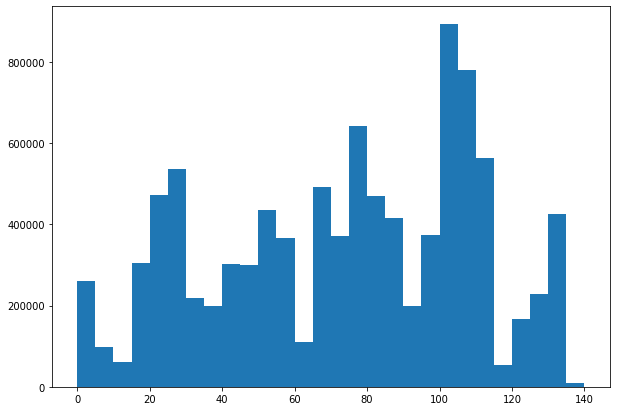

In [12]:
from matplotlib import pyplot as plt
  
a = np.array(train_labels)

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, 5, 10, 15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140])
  
# Show plot
plt.show()

## Distribution of Subset Data

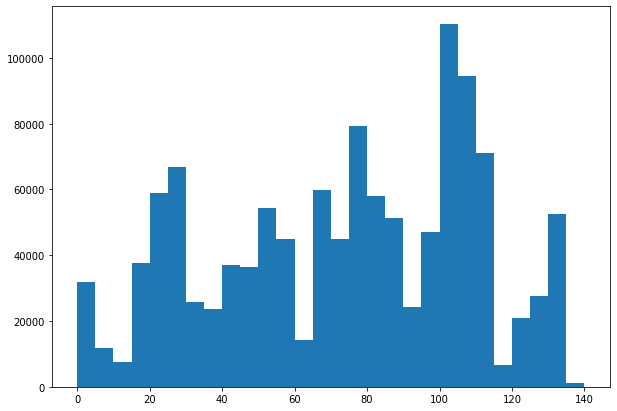

In [80]:
from matplotlib import pyplot as plt
  
k = np.array(train_labels[1:1200000])

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(k, bins = [0, 5, 10, 15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140])
  
# Show plot
plt.show()

## Shaping the Dataset for 1D CNN

### Since we are going to run the dataset on 1D CNN, we modified the data set initially using 3 contexts and then reshaping the dataset to fit in to the CNN and apply one hot encoding to the label data

In [6]:
CNN_trainX = train_data.reshape(9748009, 120, 1)
CNN_trainY = to_categorical(train_labels, num_classes=138)

#CNN_testX = dev_data.reshape(1080827, 120, 1)
#CNN_testY = to_categorical(dev_labels, num_classes=138)

CNN_trainX.shape, CNN_trainY.shape

((9748009, 120, 1), (9748009, 138))

## Defining CNN

In [9]:
import tensorflow as tf

In [95]:
n_timesteps, n_features, n_outputs = CNN_trainX.shape[1], CNN_trainX.shape[2], CNN_trainY.shape[1]

model = Sequential()

model.add(Conv1D(filters= 16, kernel_size= 2, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(BatchNormalization())

model.add(Conv1D(filters= 64, kernel_size= 3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(BatchNormalization())


model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters= 32, kernel_size= 2, activation='relu',  kernel_regularizer= tf.keras.regularizers.l2(l=0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters= 64, kernel_size= 3, activation='relu',  kernel_regularizer= tf.keras.regularizers.l2(l=0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters= 128, kernel_size= 3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_23 (Conv1D)           (None, 119, 16)           48        
_________________________________________________________________
batch_normalization_23 (Batc (None, 119, 16)           64        
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 117, 64)           3136      
_________________________________________________________________
batch_normalization_24 (Batc (None, 117, 64)           256       
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 58, 64)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 57, 32)            4128      
_________________________________________________________________
batch_normalization_25 (Batc (None, 57, 32)           

## Training The Model

In [75]:
fit = model.fit(CNN_trainX[1:120000], CNN_trainY[1:120000], batch_size = 32,  verbose=True , epochs= 15)

Epoch 1/15
119999/119999 [==============================] - 90s 749us/step - loss: 2.4854 - accuracy: 0.3597
Epoch 2/15
119999/119999 [==============================] - 90s 753us/step - loss: 2.4244 - accuracy: 0.3722
Epoch 3/15
119999/119999 [==============================] - 91s 761us/step - loss: 2.3720 - accuracy: 0.3813
Epoch 4/15
119999/119999 [==============================] - 92s 768us/step - loss: 2.3320 - accuracy: 0.3898
Epoch 5/15
119999/119999 [==============================] - 90s 748us/step - loss: 2.2923 - accuracy: 0.3978
Epoch 6/15
119999/119999 [==============================] - 89s 742us/step - loss: 2.2583 - accuracy: 0.4046
Epoch 7/15
119999/119999 [==============================] - 90s 749us/step - loss: 2.2227 - accuracy: 0.4113
Epoch 8/15
119999/119999 [==============================] - 91s 755us/step - loss: 2.1991 - accuracy: 0.4162
Epoch 9/15
119999/119999 [==============================] - 90s 752us/step - loss: 2.1661 - accuracy: 0.4225
Epoch 10/15
119999/

## Accuracy

In [ ]:
_, accuracy = model.evaluate(CNN_trainX[1200000:1500000], CNN_trainY[1200000:1500000], batch_size= 32, verbose= True)
print(accuracy)

## Prediction

### We load the test dataset on the kaggle and predict on the data using our trained 1D CNN

In [23]:
test = np.load("C:/bio/8th Sem/IDC 410 ML/Frame level Speech Recog/DATA/test_data_v120.npy", allow_pickle=True,encoding="latin1")

test.shape

(4620355, 120)

In [77]:
CNN_test = test.reshape(4620355, 120, 1)
y_pred = model.predict_classes(CNN_test)
y_pred.shape

(4620355,)

## Writing on the csv file

In [78]:
with open('C:/bio/8th Sem/IDC 410 ML/Frame level Speech Recog/DATA/Final_Submission6.csv', 'w') as w:
    w.write('id,label\n')
    for i in range(len(y_pred)):
            w.write(str(i)+','+str(y_pred[i])+'\n')

In [79]:
import pandas as pd

mycsv = pd.read_csv('C:/bio/8th Sem/IDC 410 ML/Frame level Speech Recog/DATA/Final_Submission6.csv')
df = pd.DataFrame(mycsv)

df.shape

(4620355, 2)